In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer

from sklearn.decomposition import PCA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Concatenate, Embedding, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
from keras.models import Model
import graphviz
import pydot

In [2]:
df = pd.read_csv('data/obesity.csv')

Gender is 1 if a respondent is male and 0 if a respondent is female.

Age is a respondent’s age in years.

family_history_with_overweight is 1 if a respondent has family member who is or was overweight, 0 if not.

FAVC is 1 if a respondent eats high caloric food frequently, 0 if not.

FCVC is 1 if a respondent usually eats vegetables in their meals, 0 if not.

NCP represents how many main meals a respondent has daily (0 for 1-2 meals, 1 for 3 meals, and 2 for more than 3 meals).

CAEC represents how much food a respondent eats between meals on a scale of 0 to 3.

SMOKE is 1 if a respondent smokes, 0 if not.

CH2O represents how much water a respondent drinks on a scale of 0 to 2.

SCC is 1 if a respondent monitors their caloric intake, 0 if not.

FAF represents how much physical activity a respondent does on a scale of 0 to 3.

TUE represents how much time a respondent spends looking at devices with screens on a scale of 0 to 2.

CALC represents how often a respondent drinks alcohol on a scale of 0 to 3.

Automobile, Bike, Motorbike, Public_Transportation, and Walking indicate a respondent’s primary mode of transportation. Their primary mode of transportation is indicated by a 1 and the other columns will contain a 0.

NObeyesdad is a 1 if a patient is obese and a 0 if not.

In [3]:
df.head()

Gender   Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0  21.0                               1     0   2.0  3.0     1      0   
1       0  21.0                               1     0   3.0  3.0     1      1   
2       1  23.0                               1     0   2.0  3.0     1      0   
3       1  27.0                               0     0   3.0  3.0     1      0   
4       1  22.0                               0     0   2.0  1.0     1      0   

   CH2O  SCC  FAF  TUE  CALC  Automobile  Bike  Motorbike  \
0   2.0    0  0.0  1.0     0           0     0          0   
1   3.0    1  3.0  0.0     1           0     0          0   
2   2.0    0  2.0  1.0     2           0     0          0   
3   2.0    0  2.0  0.0     2           0     0          0   
4   2.0    0  0.0  0.0     1           0     0          0   

   Public_Transportation  Walking  NObeyesdad  
0                      1        0           0  
1                      1        0           0  
2                      1        0           0  
3                      0        1           0  
4                      1        0           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [5]:
df.describe()

Gender          Age  family_history_with_overweight         FAVC  \
count  2111.000000  2111.000000                     2111.000000  2111.000000   
mean      0.505921    24.312600                        0.817622     0.883941   
std       0.500083     6.345968                        0.386247     0.320371   
min       0.000000    14.000000                        0.000000     0.000000   
25%       0.000000    19.947192                        1.000000     1.000000   
50%       1.000000    22.777890                        1.000000     1.000000   
75%       1.000000    26.000000                        1.000000     1.000000   
max       1.000000    61.000000                        1.000000     1.000000   

              FCVC          NCP         CAEC        SMOKE         CH2O  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      2.419043     2.685628     1.140692     0.020843     2.008011   
std       0.533927     0.778039     0.468543     0.142893     0.612953   
min       1.000000     1.000000     0.000000     0.000000     1.000000   
25%       2.000000     2.658738     1.000000     0.000000     1.584812   
50%       2.385502     3.000000     1.000000     0.000000     2.000000   
75%       3.000000     3.000000     1.000000     0.000000     2.477420   
max       3.000000     4.000000     3.000000     1.000000     3.000000   

               SCC          FAF          TUE         CALC   Automobile  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.045476     1.010298     0.657866     0.731407     0.216485   
std       0.208395     0.850592     0.608927     0.515498     0.411946   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.124505     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.625350     1.000000     0.000000   
75%       0.000000     1.666678     1.000000     1.000000     0.000000   
max       1.000000     3.000000     2.000000     3.000000     1.000000   

              Bike    Motorbike  Public_Transportation      Walking  \
count  2111.000000  2111.000000            2111.000000  2111.000000   
mean      0.003316     0.005211               0.748460     0.026528   
std       0.057502     0.072015               0.434001     0.160737   
min       0.000000     0.000000               0.000000     0.000000   
25%       0.000000     0.000000               0.000000     0.000000   
50%       0.000000     0.000000               1.000000     0.000000   
75%       0.000000     0.000000               1.000000     0.000000   
max       1.000000     1.000000               1.000000     1.000000   

        NObeyesdad  
count  2111.000000  
mean      0.460445  
std       0.498551  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [6]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

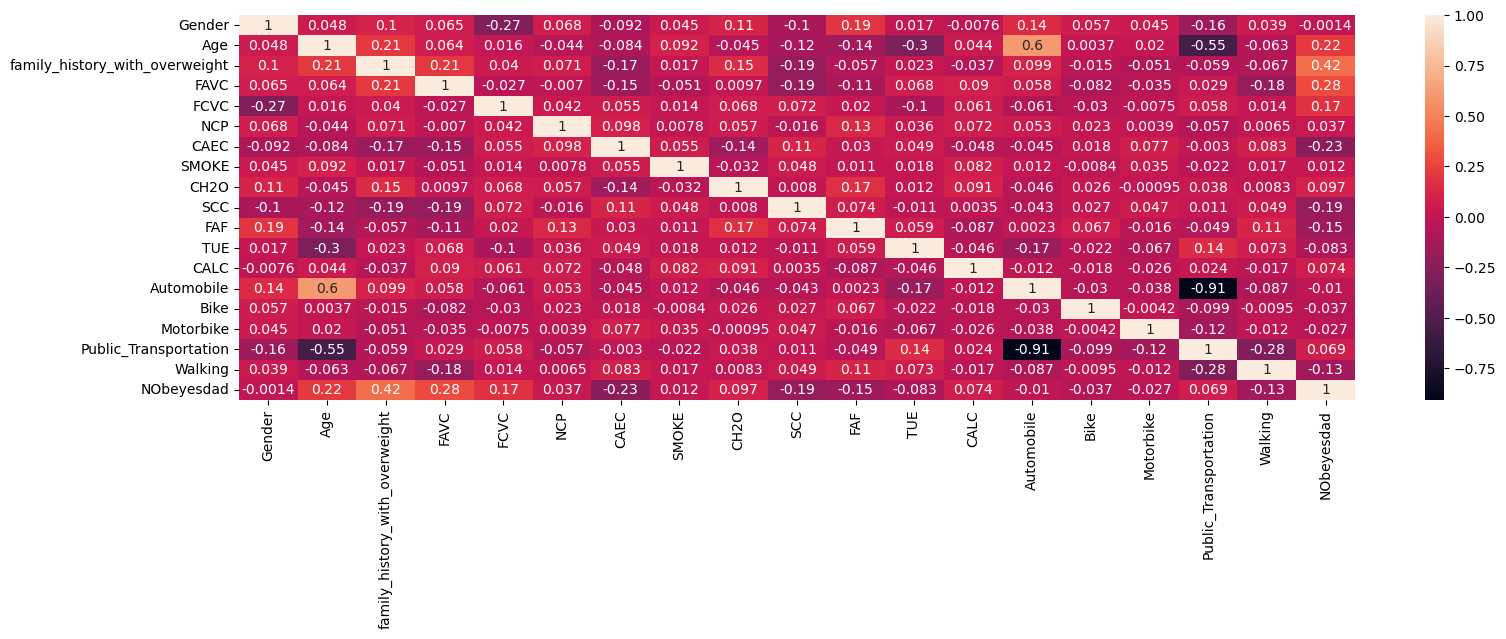

In [7]:
# correlation

plt.figure(figsize=(18, 5))
sns.heatmap(df.corr(), annot=True)

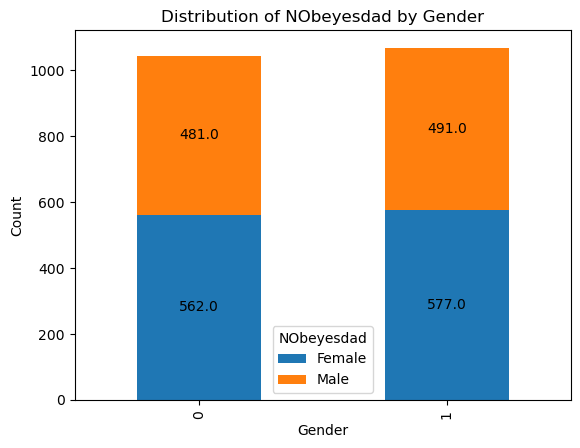

In [8]:
grouped_data = df.groupby('Gender')['NObeyesdad'].value_counts().unstack().reset_index().rename(columns = {0:'Female',1:'Male'})
grouped_data['Gender'] =  np.where(grouped_data['Gender']==1,'Male', 'Female')

# Plotting the bar plot
ax = grouped_data.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of NObeyesdad by Gender')

# Annotating the bars with count values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

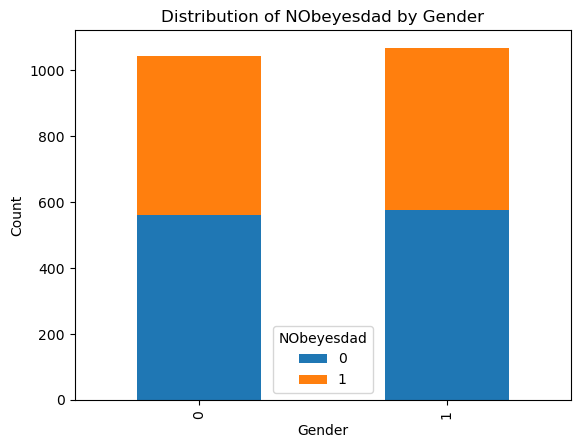

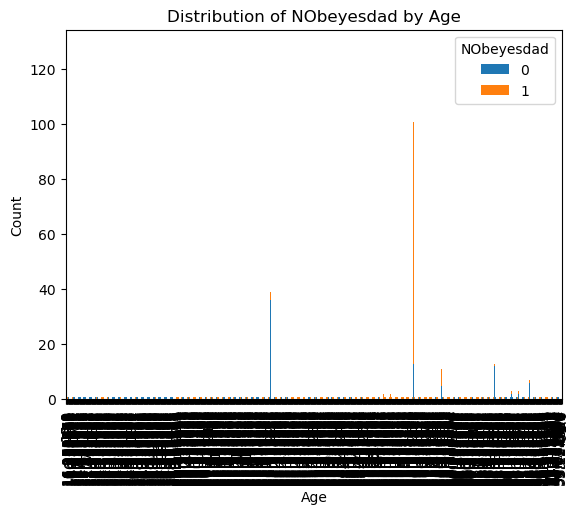

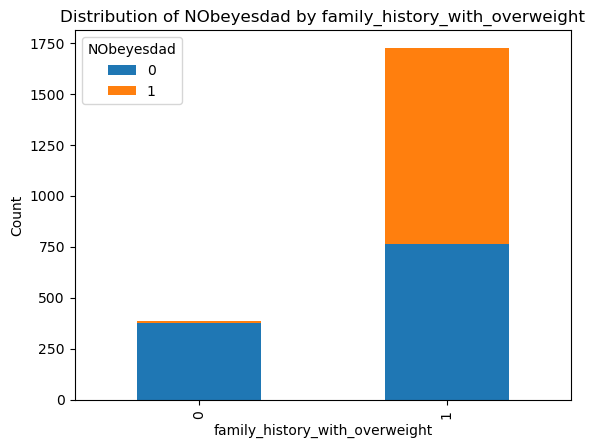

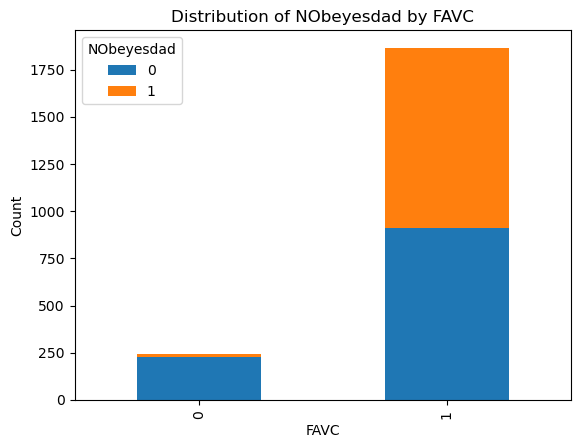

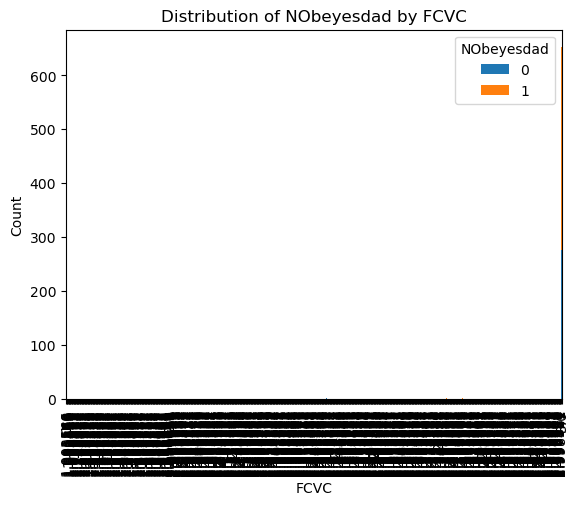

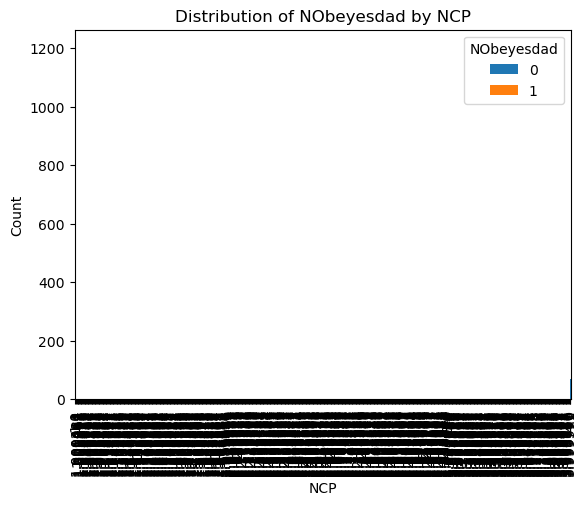

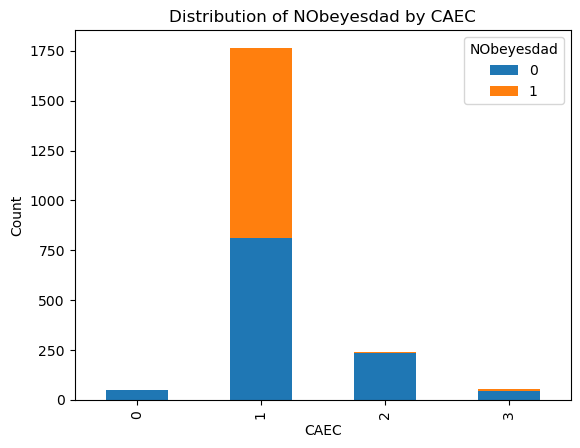

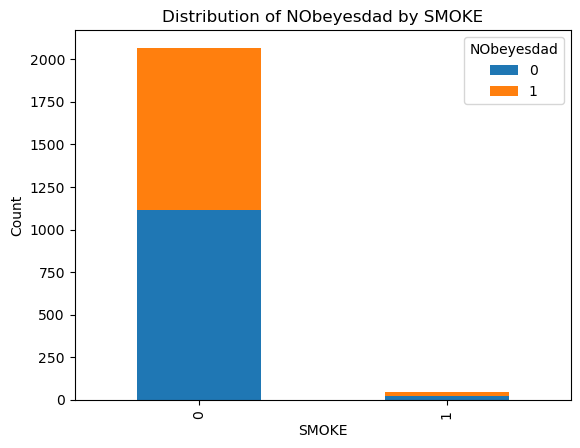

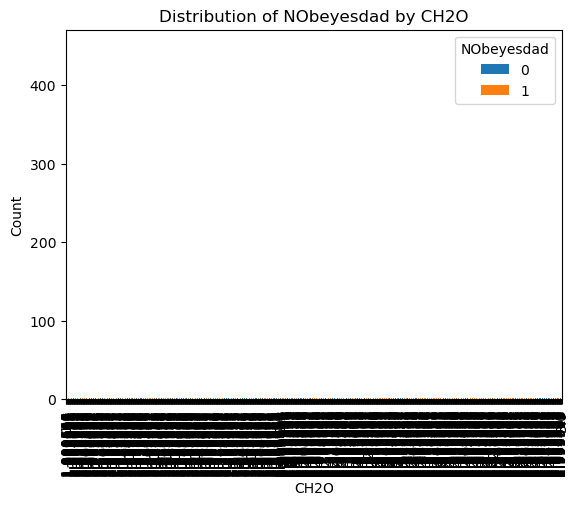

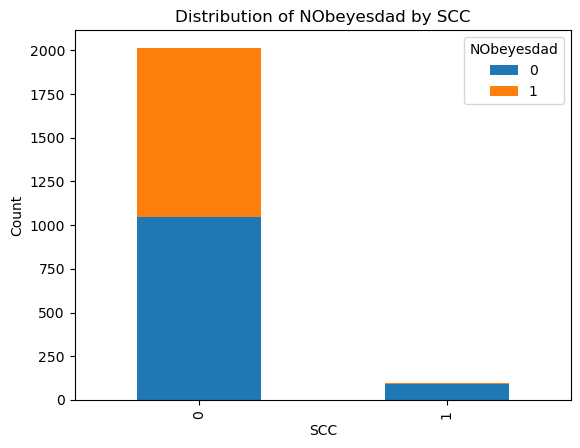

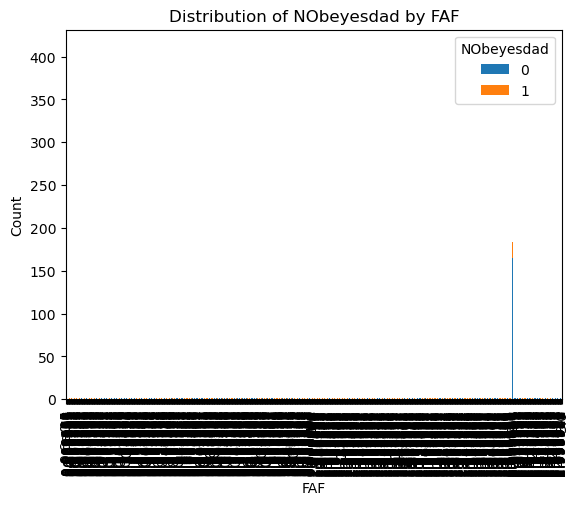

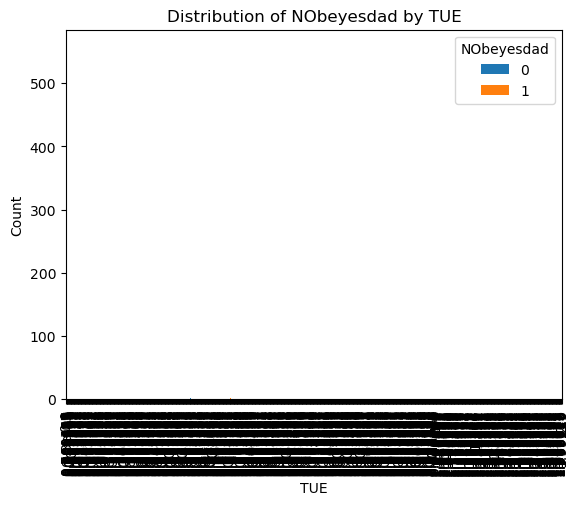

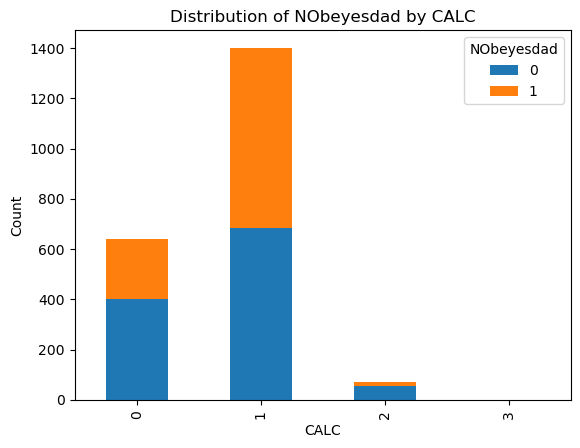

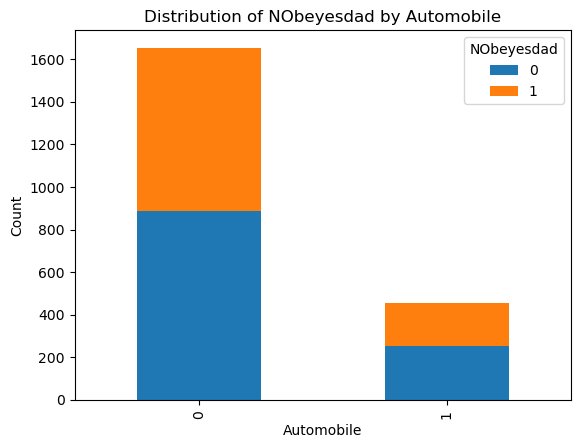

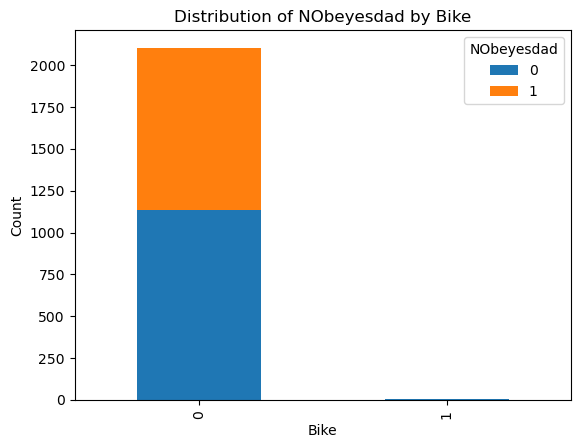

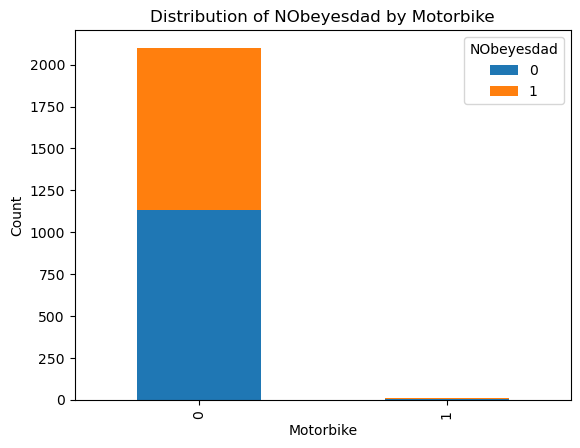

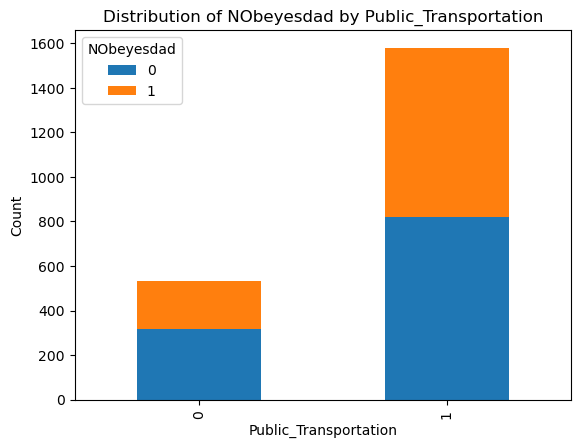

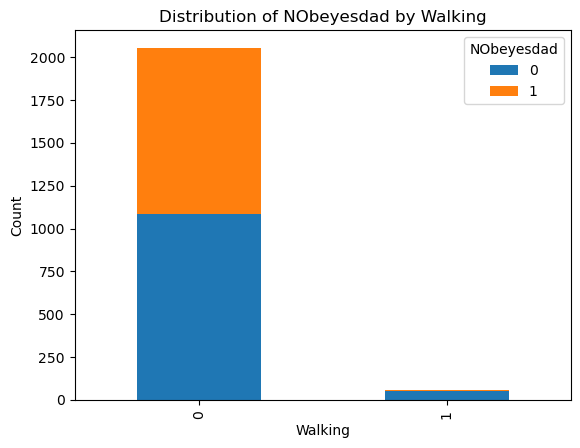

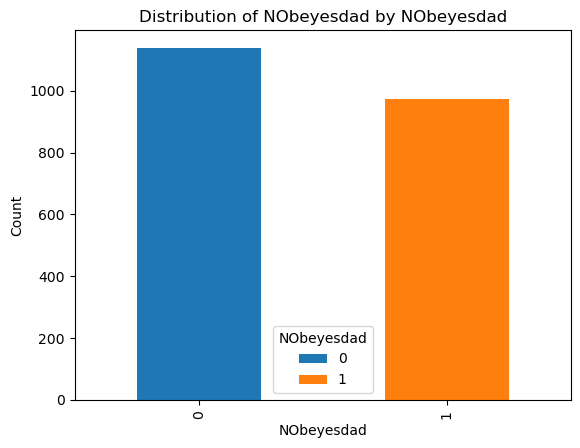

In [9]:
features = df.select_dtypes(include=['number']).columns

for f in features:
    grouped_data = df.groupby(f)['NObeyesdad'].value_counts().unstack()
    ax = grouped_data.plot(kind='bar', stacked=True) 

    plt.xlabel(f)
    plt.ylabel('Count')
    plt.title('Distribution of NObeyesdad by {}'.format(f))
    
    plt.show()
    

# Featues preparation

In [10]:
#split into X, y
X = df.drop(columns='NObeyesdad')
y= df['NObeyesdad']

# into train_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1583, 18)
(1583,)
(528, 18)
(528,)


In [11]:
#scaling
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=scaler.get_feature_names_out())

In [12]:
X_train_scaled 

Gender       Age  family_history_with_overweight      FAVC      FCVC  \
0    -1.017204 -0.416100                        0.465571  0.367106  1.018694   
1     0.983087  0.426621                        0.465571  0.367106  0.480263   
2     0.983087 -0.237722                        0.465571  0.367106  0.672200   
3     0.983087 -0.528909                        0.465571  0.367106 -2.705809   
4     0.983087 -1.100217                        0.465571  0.367106 -0.814435   
...        ...       ...                             ...       ...       ...   
1578  0.983087 -1.006675                        0.465571  0.367106 -0.814435   
1579  0.983087  0.968599                        0.465571  0.367106  0.682890   
1580 -1.017204  0.267366                        0.465571  0.367106  1.076939   
1581 -1.017204  0.267366                        0.465571  0.367106  1.076939   
1582  0.983087  1.382152                        0.465571  0.367106 -0.814435   

           NCP      CAEC     SMOKE      CH2O      SCC       FAF       TUE  \
0     0.687022  1.843225 -0.150366  1.241214 -0.23071 -0.470334  1.039524   
1    -2.179765 -0.297513 -0.150366 -1.557321 -0.23071  0.576892 -0.940531   
2     0.414108 -0.297513 -0.150366  0.848771 -0.23071 -0.106938  2.177590   
3     0.414108  3.983963 -0.150366 -0.012786 -0.23071  2.293733  0.550173   
4     0.414108 -0.297513 -0.150366 -0.012786 -0.23071 -1.177314  0.439055   
...        ...       ...       ...       ...      ...       ...       ...   
1578 -1.854820 -0.297513 -0.150366  0.185621 -0.23071 -0.020298  0.128784   
1579 -0.711257 -0.297513 -0.150366 -1.233277 -0.23071 -0.422088  0.616430   
1580  0.414108 -0.297513 -0.150366  1.057319 -0.23071 -1.177314 -0.175411   
1581  0.414108 -0.297513 -0.150366  1.093347 -0.23071 -1.177314 -0.943911   
1582 -2.179765  3.983963 -0.150366 -0.012786 -0.23071 -0.020298  2.177590   

          CALC  Automobile     Bike  Motorbike  Public_Transportation  \
0    -1.400146   -0.524961 -0.05629  -0.075617               0.581484   
1     0.515525   -0.524961 -0.05629  -0.075617               0.581484   
2     0.515525   -0.524961 -0.05629  -0.075617               0.581484   
3     0.515525   -0.524961 -0.05629  -0.075617               0.581484   
4    -1.400146   -0.524961 -0.05629  -0.075617               0.581484   
...        ...         ...      ...        ...                    ...   
1578 -1.400146   -0.524961 -0.05629  -0.075617               0.581484   
1579 -1.400146   -0.524961 -0.05629  -0.075617               0.581484   
1580  0.515525   -0.524961 -0.05629  -0.075617               0.581484   
1581  0.515525   -0.524961 -0.05629  -0.075617               0.581484   
1582  2.431195    1.904903 -0.05629  -0.075617              -1.719738   

       Walking  
0    -0.169086  
1    -0.169086  
2    -0.169086  
3    -0.169086  
4    -0.169086  
...        ...  
1578 -0.169086  
1579 -0.169086  
1580 -0.169086  
1581 -0.169086  
1582 -0.169086  

[1583 rows x 18 columns]

Text(0.5, 0, 'Feature')

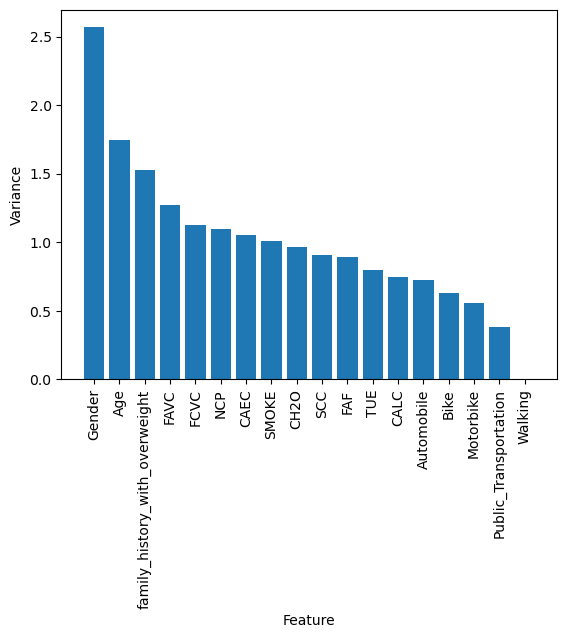

In [13]:
# principal component analysis of training X features

pca = PCA().fit(X_train_scaled)

plt.bar(X_train_scaled.columns, pca.explained_variance_)
plt.xticks(X_train_scaled.columns, rotation=90)
plt.ylabel('Variance')
plt.xlabel('Feature')

# Model preparation

# Obesity - Binary Classification

In [14]:
#init model
model = Sequential()

#adding 1st layer with the input tensor
model.add(Dense(64, 
                activation='relu',  
                input_dim=X_train_scaled.shape[1],
                kernel_initializer='uniform',
                name = 'Input-Dense-Layer'))


#adding a dropout - prevent overfitting
model.add(Dropout(0.50))

#adding 2nd layer
model.add(Dense(32,
                kernel_initializer='uniform',
                activation='relu',
                name = '2nd-Dense-Layer'))

#adding a dropout - prevent overfitting
model.add(Dropout(0.50))

# adding the output layer - binary output - sigmoid
model.add(Dense(1,
                kernel_initializer='uniform',
                activation='sigmoid',
                name = 'Output-Sigmoid-Layer'))

#adding adam optimizer with lr 0.01
optimizer = Adam(learning_rate=0.001)

#compiling the model - loss 'binary_crossentropy' - as sigmoid in the output layer
model.compile(optimizer=optimizer, 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [15]:
#checking the model
print(model.summary())

# Plot the model and save the plot to a file
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the saved plot
#img = plt.imread('model_plot.png')
#plt.imshow(img)
#plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Dense-Layer (Dense)   (None, 64)                1216      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 2nd-Dense-Layer (Dense)     (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 Output-Sigmoid-Layer (Dense  (None, 1)                33        
 )                                                               
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
______________________________________________________

In [16]:
#fitting to the data
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

model.fit(X_train_scaled, y_train, 
               batch_size = 64, 
               epochs = 100,
               validation_split=0.2,
               callbacks = [early_stopping],
               verbose=True)


Epoch 1/100
20/20 [==============================] - 6s 135ms/step - loss: 0.6905 - accuracy: 0.5387 - val_loss: 0.6858 - val_accuracy: 0.5647
Epoch 2/100
20/20 [==============================] - 0s 16ms/step - loss: 0.6758 - accuracy: 0.5458 - val_loss: 0.6548 - val_accuracy: 0.5647
Epoch 3/100
20/20 [==============================] - 0s 18ms/step - loss: 0.6274 - accuracy: 0.6106 - val_loss: 0.5802 - val_accuracy: 0.7476
Epoch 4/100
20/20 [==============================] - 0s 14ms/step - loss: 0.5554 - accuracy: 0.7480 - val_loss: 0.5112 - val_accuracy: 0.7981
Epoch 5/100
20/20 [==============================] - 0s 18ms/step - loss: 0.4951 - accuracy: 0.8017 - val_loss: 0.4619 - val_accuracy: 0.7981
Epoch 6/100
20/20 [==============================] - 0s 13ms/step - loss: 0.4464 - accuracy: 0.8175 - val_loss: 0.4321 - val_accuracy: 0.7950
Epoch 7/100
20/20 [==============================] - 0s 13ms/step - loss: 0.4284 - accuracy: 0.8199 - val_loss: 0.4157 - val_accuracy: 0.8202
Epoch

In [17]:
#evaluation on train data
tr_scores = model.evaluate(X_train_scaled, y_train, batch_size=32)
print("Train " + "%s: %.2f%%" % (model.metrics_names[1], tr_scores[1]*100))

#evaluation on test data
tt_scores = model.evaluate(X_test_scaled, y_test, batch_size=32)
print("Test " + "%s: %.2f%%" % (model.metrics_names[1], tt_scores[1]*100))

50/50 [==============================] - 0s 6ms/step - loss: 0.2902 - accuracy: 0.8907
Train accuracy: 89.07%
17/17 [==============================] - 0s 6ms/step - loss: 0.3958 - accuracy: 0.8409
Test accuracy: 84.09%


In [18]:
y_pred = np.round(model.predict(X_test_scaled),0).astype('int')

17/17 [==============================] - 0s 5ms/step


<Axes: >

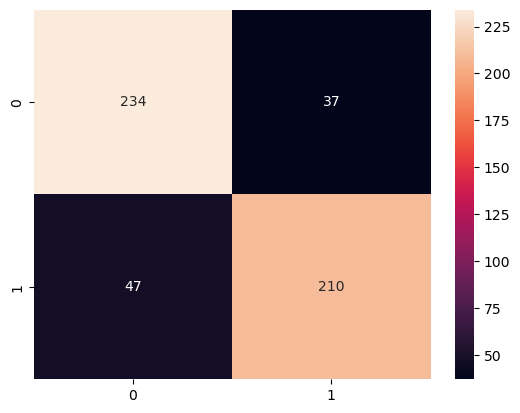

In [19]:
#confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [20]:
# validation

# Fit the model
history = model.fit(X_train_scaled, y_train, 
               batch_size = 64, 
               epochs = 100,
               validation_split=0.2,
               #callbacks = [early_stopping],
               verbose=False)

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


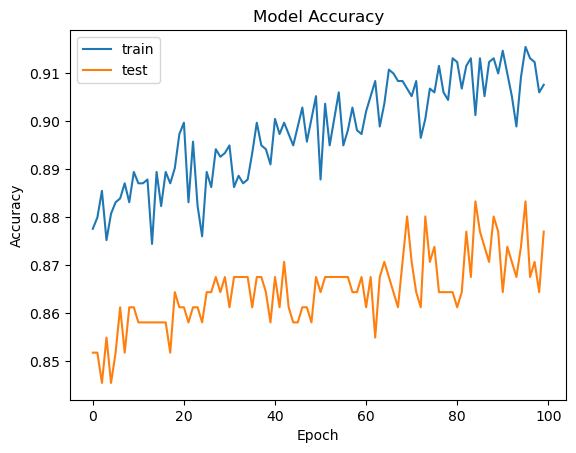

In [21]:
# summarizing historical accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

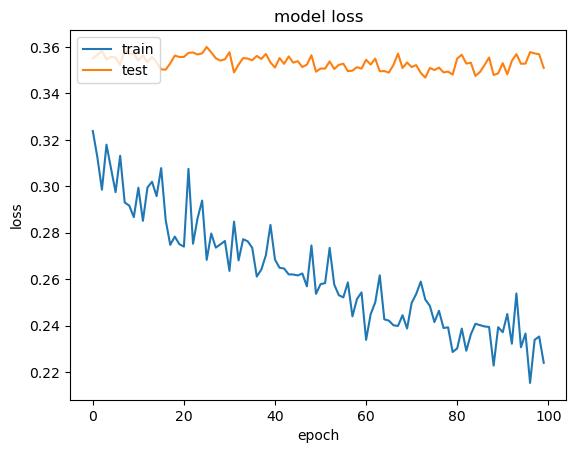

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model

# Multilabel classification

In [23]:
#split into X, y
X = df.drop(columns='CAEC')
y= df['CAEC']

# into train_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#scaling
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=scaler.get_feature_names_out())

(1583, 18)
(1583,)
(528, 18)
(528,)


In [24]:
#init model
model = Sequential()

y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

#adding 1st layer with the input tensor
model.add(Dense(64, 
                activation='relu',  
                input_dim=X_train_scaled.shape[1],
                name = 'Input-Dense-Layer'))


#adding a dropout - prevent overfitting
model.add(Dropout(0.50))

#adding 2nd layer
model.add(Dense(32,
                activation='relu',
                name = '2nd-Dense-Layer'))

#adding a dropout - prevent overfitting
model.add(Dropout(0.50))

# adding the output layer
model.add(Dense(4,
                activation='softmax',
                name = 'Output-Softmax-Layer'))

#adding adam optimizer with lr 0.01
optimizer = Adam(learning_rate=0.001)

#compiling the model
model.compile(optimizer=optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['categorical_accuracy'])

In [25]:
#fitting to the data
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

model.fit(X_train_scaled, y_train_one_hot, 
               batch_size = 64, 
               epochs = 100,
               validation_split=0.2,
               callbacks = [early_stopping],
               verbose=True)

Epoch 1/100
20/20 [==============================] - 3s 54ms/step - loss: 1.5948 - categorical_accuracy: 0.2694 - val_loss: 1.1134 - val_categorical_accuracy: 0.7161
Epoch 2/100
20/20 [==============================] - 0s 13ms/step - loss: 1.1591 - categorical_accuracy: 0.5387 - val_loss: 0.8507 - val_categorical_accuracy: 0.8423
Epoch 3/100
20/20 [==============================] - 0s 13ms/step - loss: 0.9579 - categorical_accuracy: 0.7409 - val_loss: 0.7201 - val_categorical_accuracy: 0.8423
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 0.8414 - categorical_accuracy: 0.7859 - val_loss: 0.6479 - val_categorical_accuracy: 0.8423
Epoch 5/100
20/20 [==============================] - 0s 14ms/step - loss: 0.7894 - categorical_accuracy: 0.8128 - val_loss: 0.6052 - val_categorical_accuracy: 0.8423
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 0.7090 - categorical_accuracy: 0.8081 - val_loss: 0.5744 - val_categorical_accuracy: 0.8423
Epoc

In [26]:
#evaluation on train data
tr_scores = model.evaluate(X_train_scaled, y_train_one_hot, batch_size=32)
print("Train " + "%s: %.2f%%" % (model.metrics_names[1], tr_scores[1]*100))

#evaluation on test data
tt_scores = model.evaluate(X_test_scaled, y_test_one_hot, batch_size=32)
print("Test " + "%s: %.2f%%" % (model.metrics_names[1], tt_scores[1]*100))

50/50 [==============================] - 0s 5ms/step - loss: 0.3774 - categorical_accuracy: 0.8774
Train categorical_accuracy: 87.74%
17/17 [==============================] - 0s 6ms/step - loss: 0.4316 - categorical_accuracy: 0.8636
Test categorical_accuracy: 86.36%


In [27]:
y_pred = np.round(model.predict(X_test_scaled),0).astype('int')

17/17 [==============================] - 0s 4ms/step


In [29]:
# validation

# Fit the model
history = model.fit(X_train_scaled, y_train_one_hot, 
               batch_size = 64, 
               epochs = 100,
               validation_split=0.2,
               #callbacks = [early_stopping],
               verbose=False)

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


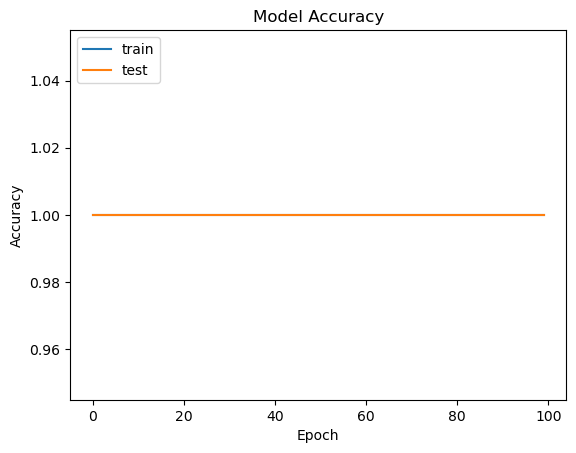

In [ ]:
# summarizing historical accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

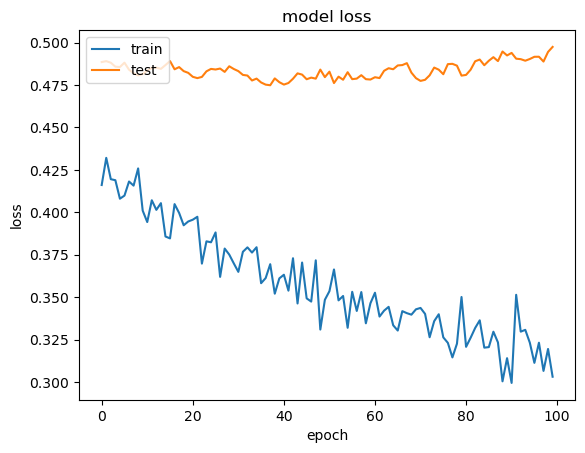

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model preparation

# Obesity - Regression

In [31]:
#split into X, y
X = df.drop(columns='Age')
y= df['Age']

# into train_test
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#scaling
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=scaler.get_feature_names_out())

(1583, 18)
(1583,)
(528, 18)
(528,)


In [32]:
#init model
model = Sequential()

#adding 1st layer with the input tensor
model.add(Dense(64, 
                activation='relu',  
                input_dim=X_train_scaled.shape[1],
                name = 'Input-Dense-Layer'))


#adding a dropout - prevent overfitting
model.add(Dropout(0.50))

#adding 2nd layer
model.add(Dense(32,
                activation='relu',
                name = '2nd-Dense-Layer'))

#adding a dropout - prevent overfitting
model.add(Dropout(0.50))

# adding the output layer
model.add(Dense(1,
                activation='linear',
                name = 'Output-Linear-Layer'))

#adding adam optimizer with lr 0.01
optimizer = Adam(learning_rate=0.001)

#compiling the model
model.compile(optimizer=optimizer, 
              loss = 'mean_squared_error', 
              metrics = ['mse'])

In [33]:
#fitting to the data
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

model.fit(X_train_scaled, y_train, 
               batch_size = 64, 
               epochs = 100,
               validation_split=0.2,
               callbacks = [early_stopping],
               verbose=True)

Epoch 1/100
20/20 [==============================] - 4s 74ms/step - loss: 638.9553 - mse: 638.9553 - val_loss: 617.6962 - val_mse: 617.6962
Epoch 2/100
20/20 [==============================] - 1s 48ms/step - loss: 572.9042 - mse: 572.9042 - val_loss: 558.8300 - val_mse: 558.8300
Epoch 3/100
20/20 [==============================] - 0s 18ms/step - loss: 511.4261 - mse: 511.4261 - val_loss: 488.2629 - val_mse: 488.2629
Epoch 4/100
20/20 [==============================] - 0s 12ms/step - loss: 431.9040 - mse: 431.9040 - val_loss: 398.7285 - val_mse: 398.7285
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 344.4588 - mse: 344.4588 - val_loss: 294.2718 - val_mse: 294.2718
Epoch 6/100
20/20 [==============================] - 0s 16ms/step - loss: 247.0269 - mse: 247.0269 - val_loss: 188.7049 - val_mse: 188.7049
Epoch 7/100
20/20 [==============================] - 0s 15ms/step - loss: 165.1026 - mse: 165.1026 - val_loss: 106.2356 - val_mse: 106.2356
Epoch 8/100
20/20 [=

In [34]:
#evaluation on train data
tr_scores = model.evaluate(X_train_scaled, y_train, batch_size=32)
print("Train " + str(tr_scores[1]))

#evaluation on test data
tt_scores = model.evaluate(X_test_scaled, y_test, batch_size=32)
print("Test " + str(tt_scores[1]))

50/50 [==============================] - 0s 5ms/step - loss: 23.3596 - mse: 23.3596
Train 23.359601974487305
17/17 [==============================] - 0s 13ms/step - loss: 18.7877 - mse: 18.7877
Test 18.787656784057617


In [35]:
# validation

# Fit the model
history = model.fit(X_train_scaled, y_train, 
               batch_size = 64, 
               epochs = 100,
               validation_split=0.2,
               #callbacks = [early_stopping],
               verbose=False)

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


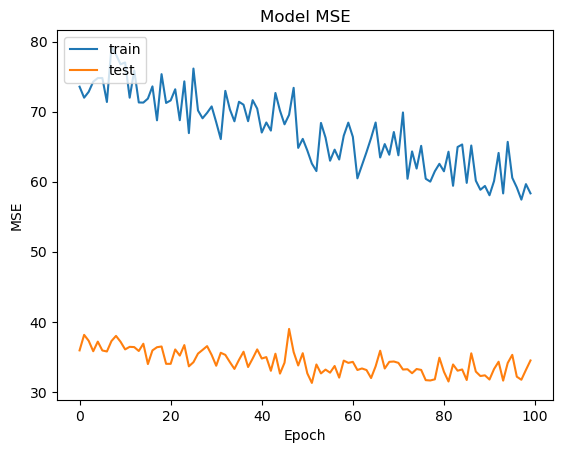

In [36]:
# summarizing historical accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

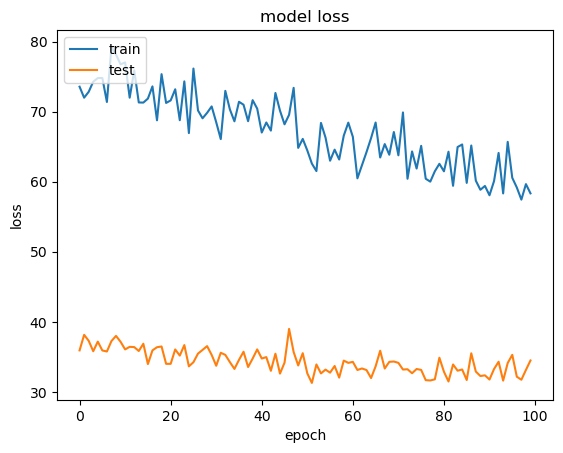

In [37]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()